#**Block 3 Python**
Final Project
IT-2201

Assimov Ilyarzhan , Assimov Ilham , Nurlan Narqyz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataVis/data (1).csv')
print(df.head(10))

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2
5  2018-01-04      1  address_0    product_5           2
6  2018-01-04      1  address_0    product_6           0
7  2018-01-04      1  address_0    product_7           1
8  2018-01-04      1  address_0    product_8           1
9  2018-01-04      1  address_0    product_9           0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [ ]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')
print(df['Дата'].dtype)

datetime64[ns]


Сгруппируйте данные по дате, посчитайте количество продаж

In [ ]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество продаж')
print(grouped_df)

          Дата  Количество продаж
0   2018-01-04               1840
1   2018-01-05               1301
2   2018-01-06               1306
3   2018-01-07               1322
4   2018-01-09               1719
..         ...                ...
200 2018-08-26               1462
201 2018-08-28               1731
202 2018-08-29               1497
203 2018-08-30               1445
204 2018-08-31               1366

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [ ]:
grouped_df.head()

,Дата,Количество продаж
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719


Нарисуйте график продаж у `grouped_df`

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=grouped_df['Дата'],
    y=grouped_df['Количество продаж'],
    mode='lines+markers',
    marker=dict(color='purple', size=8),
    line=dict(color='purple', width=2),
    name='Количество продаж'
))

fig.update_layout(
    title=dict(
        text='График продаж по датам',
        font=dict(size=20, family='Arial', color='black')
    ),
    xaxis=dict(
        title='Дата',
        titlefont=dict(size=16),
        tickangle=45,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title='Количество продаж',
        titlefont=dict(size=16),
        tickfont=dict(size=12)
    ),
    plot_bgcolor='rgba(240, 240, 255, 0.9)',
    hovermode='x'
)

fig.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

#На графике отображаются данные о продажах с течением времени с начала января 2018 г. по сентябрь 2018 г. На оси X показаны даты, а на оси Y — количество продаж.

Обзор графика: Период наблюдения: данные охватывают период с января по сентябрь 2018 года.

Колебания продаж: наблюдаются значительные колебания объемов продаж, примерно от 1200 до 1800 единиц.

Тенденции: В начале периода (январь 2018 года) наблюдается резкий пик, продажи достигают около 1800 единиц.

После этого можно наблюдать регулярные взлеты и падения: продажи варьируются от 1300 до 1600 единиц с марта по май, демонстрируя небольшой рост и снижение.

В конце мая и начале июня наблюдается незначительная тенденция к росту: к августу продажи достигают примерно 1700–1800 единиц.

Сезонные закономерности: данные могут отражать сезонные тенденции продаж, поскольку в течение нескольких месяцев наблюдаются постоянные изменения.

Пики и минимумы: на протяжении всего периода можно увидеть несколько пиков, когда продажи превышают 1700 единиц, а также спадов, когда продажи падают до 1300 единиц или ниже.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [ ]:
# Calculate IQR to identify outliers
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = df[(df['Количество'] < Q1 - 1.5 * IQR) | (df['Количество'] > Q3 + 1.5 * IQR)]
max_outlier_row = outliers[outliers['Количество'] == outliers['Количество'].max()]

max_outlier_row


,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [ ]:
pip install chardet


We have to filter the data for Wednesdays (weekday=2), for June, July, and August at Warehouse 3, then find the product with the highest sales

In [ ]:
# Filter data for the conditions
df_filtered = df[
    (df['Дата'].dt.weekday == 2) &
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Склад'] == 3)
]

# Group by 'Номенклатура' and sum sales, then find top product
top_product = df_filtered.groupby('Номенклатура')['Количество'].sum().idxmax()
top_product


'product_1'

Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [ ]:
df_weather = pd.read_csv('/content/dftempdb.csv', sep=';', skipinitialspace=True, encoding='utf-8')

print(df_weather.head())

  Местное время в Астане    T     Po      P   Pa   U  \
0       21.10.2024 23:00  5.5  728.7  760.3 -0.1  84   
1       21.10.2024 20:00  6.6  728.8  760.3 -0.6  81   
2       21.10.2024 17:00  6.1  729.4  760.9 -0.3  91   
3       21.10.2024 14:00  6.6  729.7  761.3 -0.7  90   
4       21.10.2024 11:00  8.4  730.4  761.8 -0.8  58   

                                Um  DD  Ff  ff10  ...  \
0                 Штиль, безветрие   0 NaN   NaN  ...   
1  Ветер, дующий с юго-юго-востока   1 NaN   NaN  ...   
2              Ветер, дующий с юга   2 NaN   NaN  ...   
3  Ветер, дующий с юго-юго-востока   2 NaN   NaN  ...   
4  Ветер, дующий с юго-юго-востока   3 NaN   NaN  ...   

                                                  Cm   Ch   VV   Td   RRR  \
0  Перистых, перисто-кучевых или перисто-слоистых...  NaN  2.9  2.0  12.0   
1  Перистых, перисто-кучевых или перисто-слоистых...  NaN  3.6  2.0  12.0   
2                                                NaN  4.0  4.7  NaN   NaN   
3           

In [ ]:
df_weather

,Местное время в Астане,T,Po,P,Pa,U,Um,DD,Ff,ff10,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,21.10.2024 23:00,5.5,728.7,760.3,-0.1,84,"Штиль, безветрие",0,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",NaN,2.9,2.0,12.0,NaN,NaN,NaN,NaN,NaN
1,21.10.2024 20:00,6.6,728.8,760.3,-0.6,81,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",NaN,3.6,2.0,12.0,NaN,NaN,NaN,NaN,NaN
2,21.10.2024 17:00,6.1,729.4,760.9,-0.3,91,"Ветер, дующий с юга",2,NaN,NaN,...,NaN,4.0,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.10.2024 14:00,6.6,729.7,761.3,-0.7,90,"Ветер, дующий с юго-юго-востока",2,NaN,NaN,...,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.10.2024 11:00,8.4,730.4,761.8,-0.8,58,"Ветер, дующий с юго-юго-востока",3,NaN,NaN,...,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,01.10.2024 14:00,22.2,734.5,764.6,-2.4,28,"Ветер, дующий с северо-северо-востока",1,NaN,NaN,...,NaN,10.0,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,01.10.2024 11:00,19.4,736.9,767.3,-0.9,37,"Штиль, безветрие",0,NaN,NaN,...,"Перистые нитевидные, иногда когтевидные, не ра...",10.0,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,01.10.2024 08:00,7.1,737.8,769.7,-0.5,83,"Штиль, безветрие",0,NaN,NaN,...,"Перистые нитевидные, иногда когтевидные, не ра...",10.0,4.4,NaN,NaN,"Cухая (без трещин, заметного количества пыли и...",2.0,NaN,NaN,NaN
166,01.10.2024 05:00,4.9,738.3,770.5,-0.7,85,"Штиль, безветрие",0,NaN,NaN,...,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_weather['T']

,T
0,5.5
1,6.6
2,6.1
3,6.6
4,8.4
...,...
163,22.2
164,19.4
165,7.1
166,4.9


In [ ]:
df_weather['Дата'] = pd.to_datetime(df_weather['Местное время в Астане']).dt.date

<ipython-input-193-5414d27edf69>:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_weather['Дата'] = pd.to_datetime(df_weather['Местное время в Астане']).dt.date


In [ ]:
df_weather['Дата']

,Дата
0,2024-10-21
1,2024-10-21
2,2024-10-21
3,2024-10-21
4,2024-10-21
...,...
163,2024-10-01
164,2024-10-01
165,2024-10-01
166,2024-10-01


In [ ]:
df_weather['T'] = pd.to_numeric(df_weather['T'], errors='coerce')
df_weather_daily = df_weather.groupby('Дата').agg({'T': 'mean'}).reset_index()

In [ ]:
df_weather_daily

,Дата,T
0,2024-10-01,13.9875
1,2024-10-02,10.6125
2,2024-10-03,6.4375
3,2024-10-04,9.6625
4,2024-10-05,10.9375
5,2024-10-06,12.0125
6,2024-10-07,9.0500
7,2024-10-08,11.6250
8,2024-10-09,14.7500
9,2024-10-10,13.4500


In [ ]:
# Предположим, что колонка 'Ro' содержит данные по продажам или другой метрике, мы выбираем нужные колонки
grouped_df = df_weather.groupby('Дата').agg({'Po': 'mean'}).reset_index()

In [ ]:
grouped_df

,Дата,Po
0,2024-10-01,735.6750
1,2024-10-02,734.3500
2,2024-10-03,740.0500
3,2024-10-04,740.0625
4,2024-10-05,734.5875
5,2024-10-06,729.9000
6,2024-10-07,736.4875
7,2024-10-08,738.6625
8,2024-10-09,732.4875
9,2024-10-10,725.7375


In [ ]:
df_merged = pd.merge(grouped_df, df_weather_daily, on='Дата', how='inner')


In [ ]:
df_merged

,Дата,Po,T
0,2024-10-01,735.6750,13.9875
1,2024-10-02,734.3500,10.6125
2,2024-10-03,740.0500,6.4375
3,2024-10-04,740.0625,9.6625
4,2024-10-05,734.5875,10.9375
5,2024-10-06,729.9000,12.0125
6,2024-10-07,736.4875,9.0500
7,2024-10-08,738.6625,11.6250
8,2024-10-09,732.4875,14.7500
9,2024-10-10,725.7375,13.4500


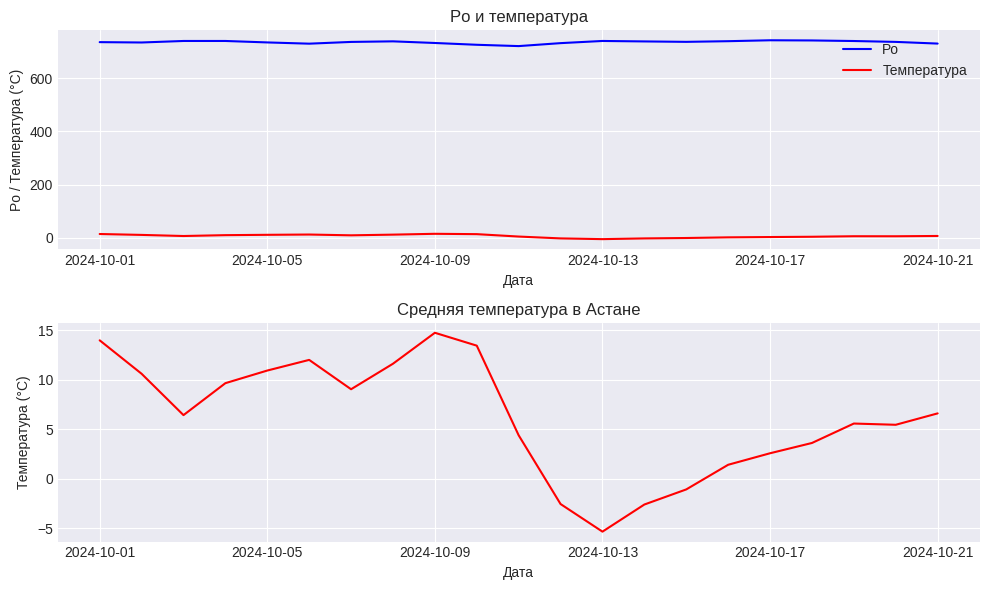

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))

# Первый график: количество продаж и температура
plt.subplot(2, 1, 1)
plt.plot(df_merged['Дата'], df_merged['Po'], label='Po', color='blue')
plt.plot(df_merged['Дата'], df_merged['T'], label='Температура', color='red')
plt.xlabel('Дата')
plt.ylabel('Po / Температура (°C)')
plt.legend(loc='upper right')
plt.title('Po и температура')

# Второй график: температура отдельно
plt.subplot(2, 1, 2)
plt.plot(df_weather_daily['Дата'], df_weather_daily['T'], color='red')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Средняя температура в Астане')

plt.tight_layout()
plt.show()